In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_col = ["sentence","brand_name","info","index","content","total","thank_you"]
y_col = ["brand_name","info","index","content","total","thank_you"]


In [412]:
train_df = pd.read_csv('../text_classification/04-08-vigrouppe.csv',   encoding='utf-8')
train_df.head()

,sentence,brand_name,info,index,content,total,thank_you
0,DT: 0903915144,0,1,0,0,0,0
1,FC GOOD COFEE,1,0,0,0,0,0
2,"ĐC: 126 Lai Hùng Cường, Vĩnh Lọc B,",0,1,0,0,0,0
3,"Bình Chánh, TpHCM",0,1,0,0,0,0
4,ĐT: 0934145879,0,1,0,0,0,0


In [413]:
def count_pandas(df,row):
    new_pandas = df.query(row+">0")
    return new_pandas.shape[0]

# count_pandas(train_df,"info")

In [414]:
# Delete same data
# delete_data = []
# for index, row in train_df.iterrows():
#     sentence = row['sentence']
#     for i,r in train_df.iterrows():
#         if i!= index:
#             if r['sentence'] == sentence:
#                 delete_data.append(i)
#                 print("=====")
#                 print(row['sentence'])
#                 print(r['sentence'])

In [415]:
# # delete data
# delete_data = list(set(delete_data))

# org_train_df = train_df
# org_delete_data = delete_data
# delete_data = []
# for i in org_delete_data:
#     delete_data.append(int(i))
# # for index in delete_data:
# #     train_df.drop[train_df.loc(int(index))]
# # print(len(delete_data))
# # print(delete_data)
# train_df = train_df.drop(delete_data)

In [416]:
# train_df.to_csv("31-07-vigroupped.csv", index = False,  encoding='utf-8')

In [417]:
# df.query("brand_name>0")

[31, 183, 60, 228, 133, 42]


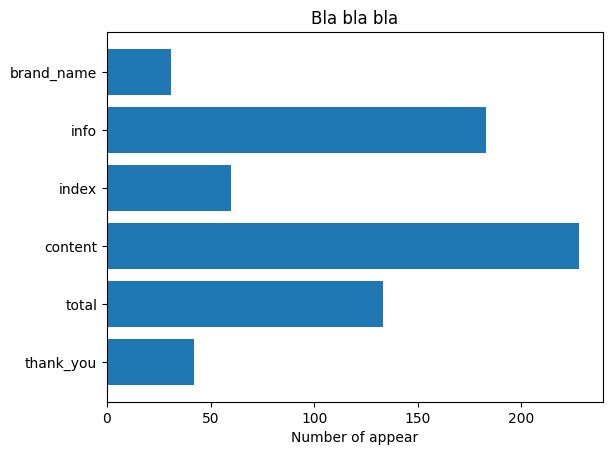

In [418]:
# Explore data
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data

y_pos = np.arange(len(y_col))
performance = []

for col in y_col:
    performance.append(count_pandas(train_df,col))

print(performance)
error = np.random.rand(len(y_col))

ax.barh(y_col, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_col)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of appear')
ax.set_title('Bla bla bla')

plt.show()

In [419]:
import numpy as np
import os
import pickle
from keras.optimizers import SGD, Adam, Nadam, RMSprop
from keras.preprocessing.text import Tokenizer as tkk
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras.models import Sequential,Model,load_model
from keras.layers import Embedding,Conv1D,MaxPooling1D
from keras.layers.core import Dense, Activation,Dropout ,Flatten
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence,one_hot,Tokenizer
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint,TensorBoard, ReduceLROnPlateau,EarlyStopping
from keras.applications import Xception
from keras import regularizers
from keras import backend as K
import keras
import numpy as np
import pandas as pd
import cv2
import os
import glob
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [420]:
seed = 120
np.random.seed(seed)
train_df = shuffle(train_df)
train_df.head()

,sentence,brand_name,info,index,content,total,thank_you
110,"_ 60,008. 60.000",0,0,0,1,0,0
620,Sl TÊN sl Đ.Giá T.TIỀN,0,0,1,0,0,0
252,Công Ty Công Nghệ TinHoc Mai | |,1,0,0,0,0,0
288,"GIAM MON. -1,750.",0,0,0,0,1,0
129,Bạc sửu 1 cốc 100.000 1 100.000,0,0,0,1,0,0


In [421]:
X_train = train_df["sentence"].fillna("fillna").values
Y_train = train_df[['brand_name', 'info', 'index', 'content', 'total', 'thank_you']].values

In [422]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)

Shape of X_train: (677,)
Shape of Y_train: (677, 6)


In [423]:
Tokenizer = tkk()
print(X_train[0])
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels
texts = X_train
print(texts[1])
print(len(texts))

_ 60,008. 60.000
(Input->Sentence) Length of X_train: (677,)
(output->Labels) Length of Y_train: (677, 6)
Sl TÊN sl Đ.Giá T.TIỀN 
677


In [424]:
viet_dict = pd.read_csv('../../Viet74K.txt',   encoding='utf-8',sep='\n')
viet_dict.head()
len(viet_dict)


73901

In [425]:
texts = texts.tolist()
texts.extend(viet_dict["sentence"].fillna("fillna").values.tolist())


In [426]:
# text = texts.tolist()
# viet_dict["sentence"].fillna("fillna").values.tolist()
print(len(texts))
texts = np.array(texts)

74578


In [427]:
Tokenizer.fit_on_texts(texts) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
print("Tokenizer vocabulary size:",Tokenizer_vocab_size)
len(max(X_train,key=len))


Tokenizer vocabulary size: 9830


45

In [428]:
def calculate_word(df,text):
    count = 0
    for row in df:
        sentence = row.lower()
        if text in sentence:
            print(sentence)
            count += len(sentence.split(text)) - 1
    return count


In [429]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (541,)
(output->Labels) Length of Y_train: (541, 6)


In [430]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [431]:
print(X_train[2])
print(X_train_encoded_words[2])
# print(Tokenizer.word_index)

115/100 Lê văn Sỹ, P.13, Q.Phú Nhuận
[6817, 2112, 555, 30, 5180, 3669, 2760, 3670, 354, 1889]


In [432]:
# print(calculate_word(X_train,'tổng'))
len(max(X_train,key=len))

45

In [433]:
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labelsprint("(Input->Sentence)

(output->Labels) Length of Y_train: (541, 6)


In [434]:
maxWordCount= 450
maxDictionary_size=Tokenizer_vocab_size
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen=maxWordCount)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen=maxWordCount)

In [435]:
print("(Input->Sentence) Length of X_train:",X_train_encoded_padded_words.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (541, 450)
(output->Labels) Length of Y_train: (541, 6)


In [436]:
print(Y_train.shape)
print(Y_val.shape)

(541, 6)
(136, 6)


In [437]:
# Model

model = Sequential()

model.add(Embedding(maxDictionary_size, 32, input_length=maxWordCount)) #to change words to ints
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
 #hidden layers
model.add(LSTM(10))
# model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(1200, activation='relu',W_constraint=maxnorm(1)))
# model.add(Dropout(0.6))
model.add(Dense(500, activation='relu',W_constraint=maxnorm(1)))

# model.add(Dropout(0.5))
 #output layer
model.add(Dense(6, activation='softmax'))

# Compile model
# adam=Adam(lr=learning_rate, beta_1=0.7, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 450, 32)           314560    
_________________________________________________________________
lstm_12 (LSTM)               (None, 10)                1720      
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 1200)              13200     
_________________________________________________________________
dense_35 (Dense)             (None, 500)               600500    
_________________________________________________________________
dense_36 (Dense)             (None, 6)                 3006      
Total params: 932,986
Trainable params: 932,986
Non-trainable params: 0
_________________________________________________________________


/home/hung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1200, activation="relu", kernel_constraint=<keras.con...)`
  from ipykernel import kernelapp as app
/home/hung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_constraint=<keras.con...)`


In [438]:
learning_rate=0.0001
epochs = 25
batch_size = 32 #32
sgd = SGD(lr=learning_rate, nesterov=True, momentum=0.7, decay=1e-4)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

In [439]:
print(X_train_encoded_padded_words.shape)
print(Y_train.shape)

print(X_val_encoded_padded_words.shape)
print(Y_val.shape)

(541, 450)
(541, 6)
(136, 450)
(136, 6)


In [440]:
history  = model.fit(X_train_encoded_padded_words,Y_train, epochs = epochs, batch_size=batch_size, verbose=1,
validation_data=(X_val_encoded_padded_words, Y_val))

Train on 541 samples, validate on 136 samples
Epoch 1/25
541/541 [==============================] - 4s 8ms/step - loss: 1.6046 - acc: 0.3272 - val_loss: 1.4431 - val_acc: 0.5074
Epoch 2/25
541/541 [==============================] - 2s 4ms/step - loss: 1.3058 - acc: 0.4935 - val_loss: 1.1312 - val_acc: 0.5147
Epoch 3/25
541/541 [==============================] - 2s 4ms/step - loss: 0.9683 - acc: 0.5952 - val_loss: 1.0388 - val_acc: 0.5735
Epoch 4/25
541/541 [==============================] - 2s 4ms/step - loss: 0.7701 - acc: 0.6765 - val_loss: 0.9129 - val_acc: 0.5882
Epoch 5/25
541/541 [==============================] - 2s 4ms/step - loss: 0.6141 - acc: 0.7412 - val_loss: 1.0753 - val_acc: 0.5588
Epoch 6/25
541/541 [==============================] - 2s 4ms/step - loss: 0.5601 - acc: 0.7800 - val_loss: 0.9977 - val_acc: 0.6324
Epoch 7/25
541/541 [==============================] - 2s 5ms/step - loss: 0.4453 - acc: 0.8152 - val_loss: 0.9102 - val_acc: 0.6544
Epoch 8/25
541/541 [==========

In [441]:
score = model.evaluate(X_val_encoded_padded_words, Y_val, verbose=1)
print('Test accuracy:', score[1],'%')

136/136 [==============================] - 0s 755us/step
Test accuracy: 0.6544117647058824 %


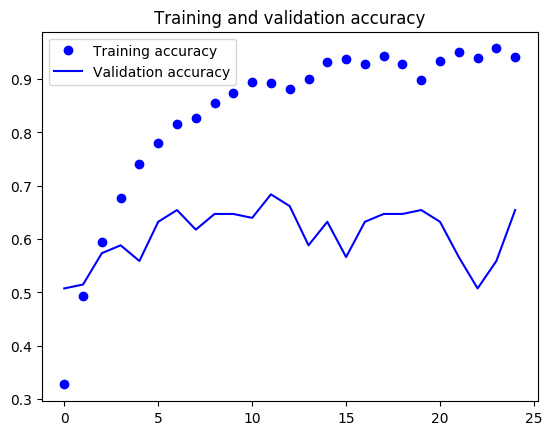

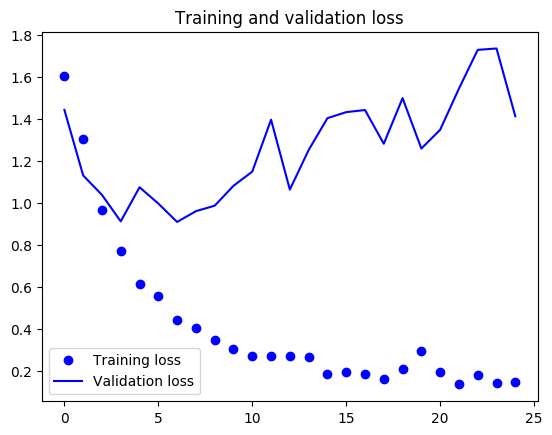

In [442]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [443]:
phrase = "3T: 0902018996"
tokens = Tokenizer.texts_to_sequences([phrase])
tokens = pad_sequences(tokens, maxlen=maxWordCount)
prediction = model.predict(np.array(tokens))
i_raw,j_raw = np.where(prediction == prediction.max()) #calculates the index of the maximum element of the array across all axis
# i->rows, j->columns
i = int(i_raw)
j = int(j_raw)
print(prediction[0][j])
print(j_raw)
total_possible_outcomes = ['brand_name', 'info', 'index', 'content', 'total', 'thank_you']
print("Result:",total_possible_outcomes[j])

0.7561964
[1]
Result: info


In [444]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(Tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)